In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Survey data _Customer comments.csv")

In [3]:
df.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member
3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member
4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member


In [4]:
df.describe()

,flight_number
count,9424.000000
mean,1741.573430
std,1550.550037
min,2.000000
25%,614.000000
50%,1286.000000
75%,2261.000000
max,6375.000000


In [5]:
df.isnull().sum()

flight_number                  0
origin_station_code            0
destination_station_code       0
scheduled_departure_date       0
arrival_delay_group            0
departure_delay_group          0
entity                         0
verbatim_text                  0
seat_factor_band               0
ques_verbatim_text             0
loyalty_program_level       2504
fleet_type_description         0
fleet_usage                    0
response_group                 0
dtype: int64

In [6]:
df.columns

Index(['flight_number', 'origin_station_code', 'destination_station_code',
       'scheduled_departure_date', 'arrival_delay_group',
       'departure_delay_group', 'entity', 'verbatim_text', 'seat_factor_band',
       'ques_verbatim_text', 'loyalty_program_level', 'fleet_type_description',
       'fleet_usage', 'response_group'],
      dtype='object')

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim import corpora, models
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
with open('myfile.txt', 'w') as f1:
    for index, row in df.iterrows():
        content = row['verbatim_text']
        f1.write(content + '\n')


In [19]:
file1 = open("myfile.txt", "r")
text = file1.read()
text = re.sub(r'\s+', ' ', text)
text=re.sub('flight', '', text)
text=re.sub('would', '', text)
text=re.sub('good', '', text)
text=re.sub('food', '', text)
text=re.sub('snack', '', text)
text=re.sub('option', '', text)
text=re.sub('meal', '', text)
text=re.sub('offered', '', text)
text=re.sub('like', '', text)
text=re.sub('choice', '', text)
text=re.sub('served', '', text)
text = text.lower()
tokens = nltk.word_tokenize(text)
tokens = [token for token in tokens if token.isalpha()]
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

preprocessed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
stemmed_tokens = [stemmer.stem(token) for token in preprocessed_tokens]

dictionary = corpora.Dictionary([preprocessed_tokens])
corpus = [dictionary.doc2bow(preprocessed_tokens)]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=10)

for topic in topics:
    print(topic)


(0, '0.001*"service" + 0.001*"beverage" + 0.000*"drink" + 0.000*"free" + 0.000*"better" + 0.000*"wine" + 0.000*"nice" + 0.000*"chicken" + 0.000*"pretzel" + 0.000*"class"')
(1, '0.009*"nice" + 0.009*"class" + 0.009*"better" + 0.009*"beverage" + 0.008*"water" + 0.008*"first" + 0.007*"service" + 0.007*"chicken" + 0.007*"could" + 0.007*"time"')
(2, '0.000*"better" + 0.000*"nice" + 0.000*"drink" + 0.000*"united" + 0.000*"great" + 0.000*"time" + 0.000*"attendant" + 0.000*"class" + 0.000*"beverage" + 0.000*"pretzel"')
(3, '0.000*"class" + 0.000*"better" + 0.000*"beverage" + 0.000*"water" + 0.000*"drink" + 0.000*"time" + 0.000*"get" + 0.000*"one" + 0.000*"nice" + 0.000*"great"')
(4, '0.001*"better" + 0.001*"first" + 0.001*"chicken" + 0.001*"time" + 0.001*"great" + 0.001*"class" + 0.001*"nice" + 0.001*"beverage" + 0.001*"one" + 0.001*"water"')


In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    nltk.download('vader_lexicon')
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment_scores

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment_scores['compound'], sentiment

df["sentiment_score"] = ""
df["sentiment"] = ""

for i, row in df.iterrows():
    text = str(row["verbatim_text"])
    sentiment_scores, sentiment = analyze_sentiment(text)

    df.at[i, "sentiment_score"] = sentiment_scores
    df.at[i, "sentiment"] = sentiment




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [20]:

total_comments = len(df)
positive_comments = df[df['sentiment'] == "Positive"]
negative_comments = df[df['sentiment'] == "Negative"]
neutral_comments = df[df['sentiment'] == "Neutral"]

percentage_positive = (len(positive_comments) / total_comments) * 100
percentage_negative = (len(negative_comments) / total_comments) * 100
percentage_neutral = (len(neutral_comments) / total_comments) * 100

print("Percentage of Positive Comments:", percentage_positive)
print("Percentage of Negative Comments:", percentage_negative)
print("Percentage of Neutral Comments:", percentage_neutral)


Percentage of Positive Comments: 45.097623089983024
Percentage of Negative Comments: 27.70585738539898
Percentage of Neutral Comments: 27.196519524617997


In [11]:
df.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiment_score,sentiment
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,-0.296,Negative
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,0.0,Neutral
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,0.0,Neutral
3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,-0.5413,Negative
4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,0.0,Neutral


In [ ]:
df.to_csv("cus_comments.csv")

In [12]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text.lower())
    preprocessed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return preprocessed_tokens
positive_comments = []
neutral_comments = []
negative_comments = []

for i, row in df.iterrows():
    text = str(row["verbatim_text"])
    preprocessed_text = preprocess_text(text)

    if row["sentiment_score"] > 0.05:
        positive_comments.extend(preprocessed_text)
    elif row["sentiment_score"] < -0.05:
        negative_comments.extend(preprocessed_text)
    else:
        neutral_comments.extend(preprocessed_text)



positive_word_freq = Counter(positive_comments)
negative_word_freq = Counter(negative_comments)
neutral_word_freq = Counter(neutral_comments)


word_scores = {}

for word in positive_word_freq:
    positive_freq = positive_word_freq[word]
    negative_freq = negative_word_freq.get(word, 0)
    neutral_freq = neutral_word_freq.get(word, 0)

    word_scores[word] = positive_freq / (negative_freq + neutral_freq + 1)

top_positive_words = sorted(word_scores, key=word_scores.get, reverse=True)[:100]
top_negative_words = sorted(word_scores, key=word_scores.get)[:100]


print("Top Positive Words:", top_positive_words)
print("Top Negative Words:", top_negative_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top Positive Words: ['improve', 'liked', 'loved', 'job', 'love', 'yes', 'pleasantly', 'appreciated', 'nice', 'surprisingly', 'wish', 'thank', 'better', 'nicer', 'flavored', 'free', 'enjoyed', 'bringing', 'hand', 'hoping', 'guest', 'travel', 'welcomed', 'gluten', 'excellent', 'united', 'sweet', 'super', 'improvement', 'along', 'den', 'complimentary', 'please', 'substantial', 'gf', 'surprise', 'delicious', 'impressed', 'aha', 'yummy', 'store', 'clean', 'efficient', 'increase', 'mileage', 'safety', 'entertainment', 'surprising', 'well', 'appreciate', 'ability', 'sparkling', 'thanks', 'creative', 'greater', 'wonderful', 'consistently', 'sky', 'muffin', 'fact', 'terrific', 'value', 'flavorful', 'declined', 'pure', 'italy', 'tofu', 'healthy', 'friendly', 'help', 'best', 'happy', 'touch', 'surprised', 'helped', 'outstanding', 'favorite', 'like', 'would', 'pleased', 'great', 'state', 'friend', 'thankful', 'certainly', 'glad', 'comfort', 'luckily', 'trail', 'soy', 'carried', 'thoughtful', 'expr

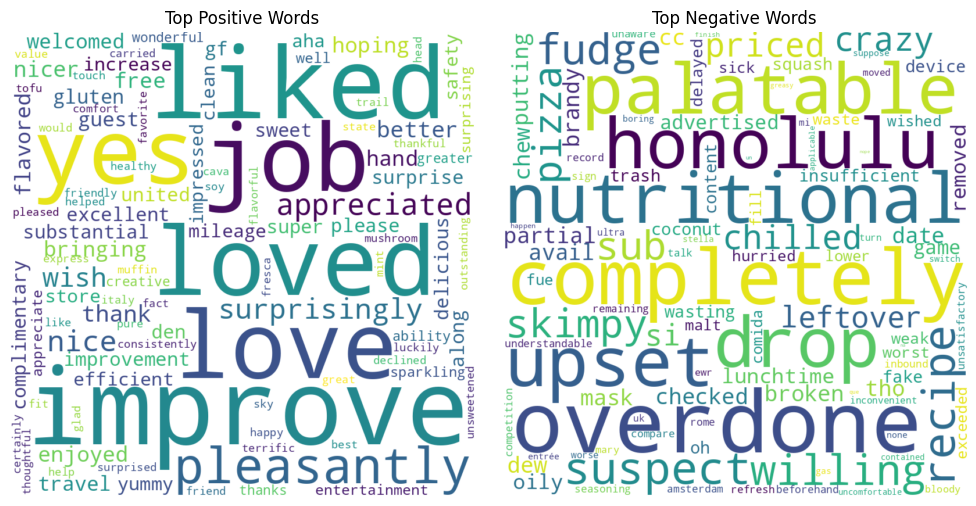

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100)
positive_wordcloud.generate_from_frequencies({word: word_scores[word] for word in top_positive_words})

negative_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100)
negative_wordcloud.generate_from_frequencies({word: word_scores[word] for word in top_negative_words})

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Top Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Top Negative Words')
plt.axis('off')

plt.tight_layout()
plt.show()
